In [84]:
import subprocess
import os

import pandas as pd

import requests
from bs4 import BeautifulSoup

import json


pd.set_option('display.max_rows', 500)

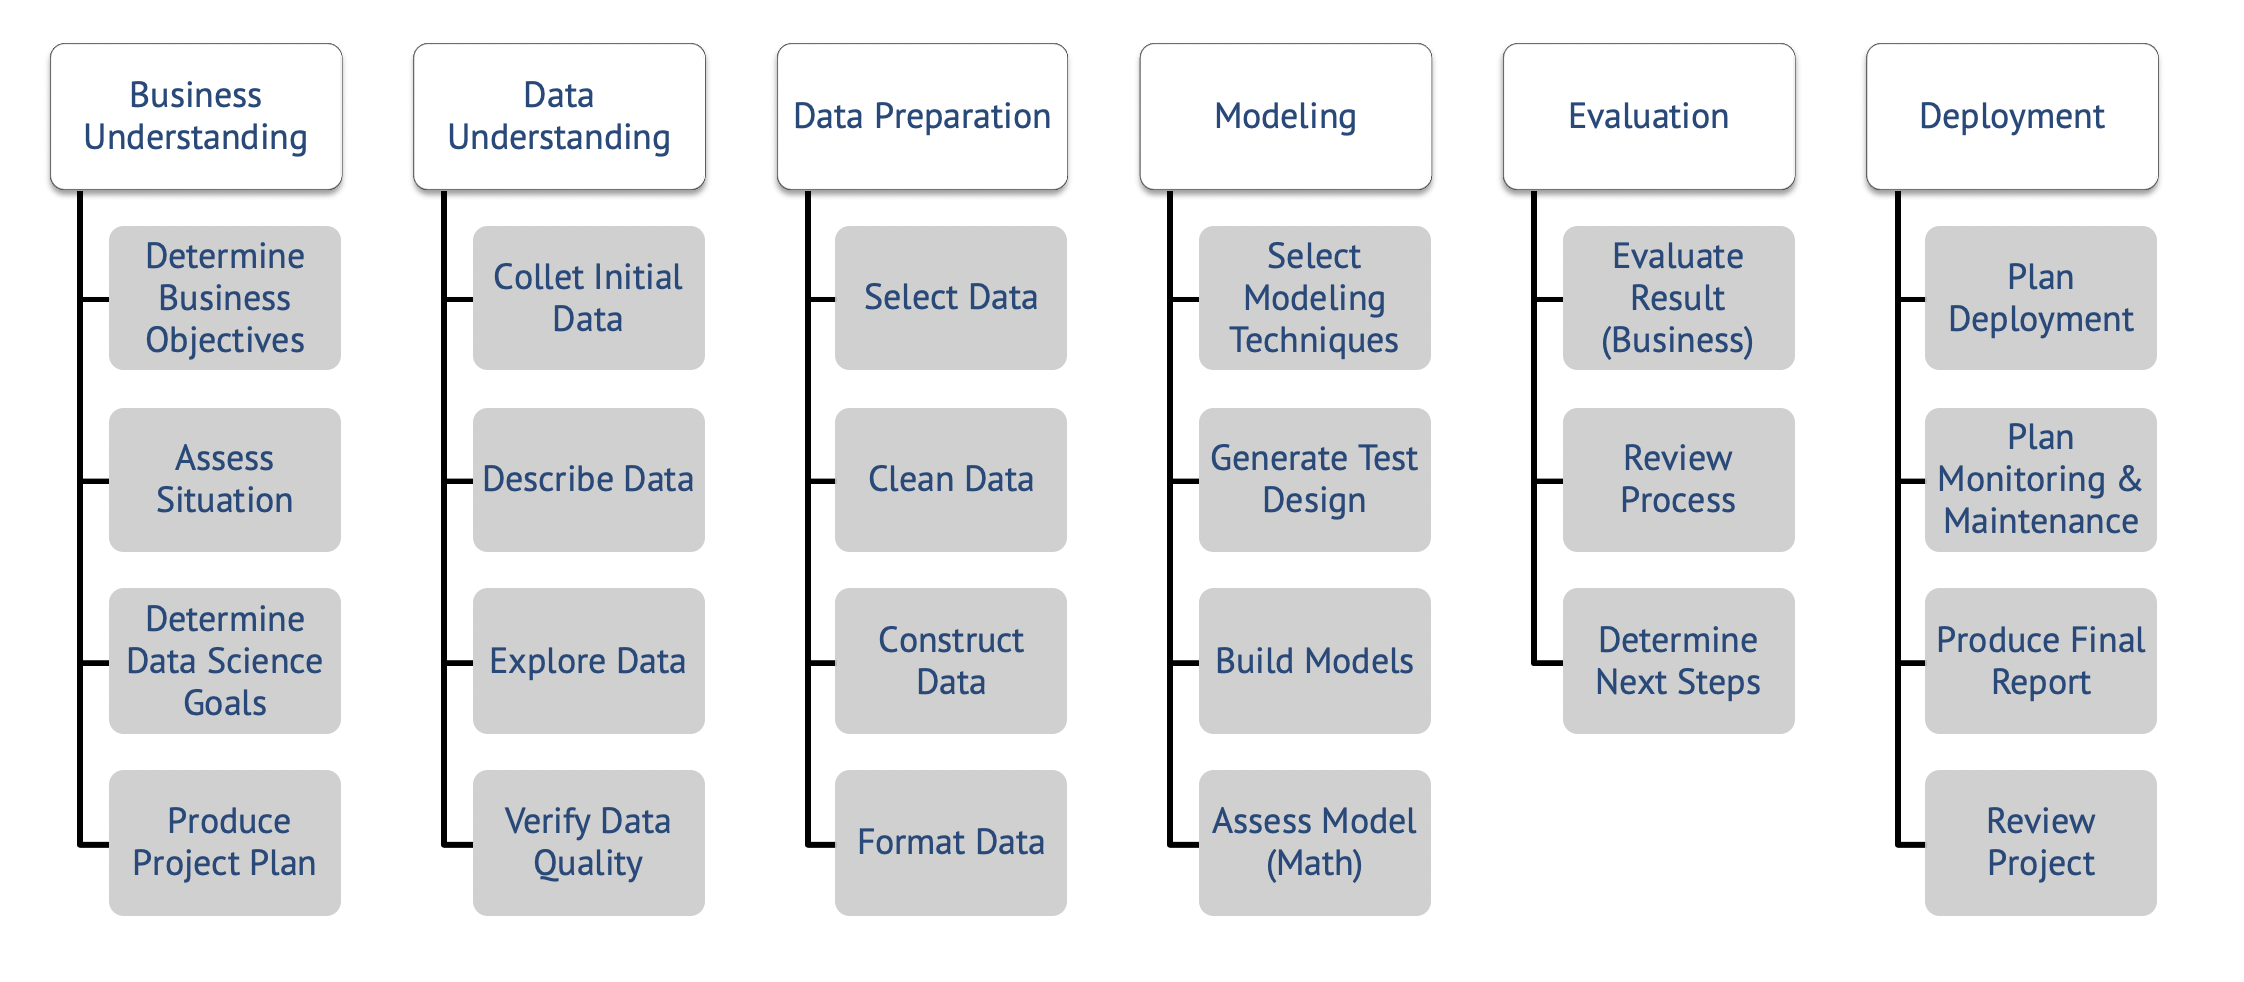

# Data Understanding

* RKI, webscrape (webscraping) https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html
* John Hopkins (GITHUB) https://github.com/CSSEGISandData/COVID-19.git
* REST API services to retreive data https://npgeo-corona-npgeo-de.hub.arcgis.com/

# GITHUB csv data

In [30]:
import pandas as pd

In [87]:
git_pull = subprocess.Popen( "/usr/bin/git pull" , 
                     cwd = os.path.dirname( r"D:\SEM 4\Data Science\ads_covid-19\data\raw\COVID-19" ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()


print("Error : " + str(error)) 
print("out : " + str(out))

Error : b'The system cannot find the path specified.\r\n'
out : b''


In [ ]:
data_path=r"D:\SEM 4\Data Science\ads_covid-19\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"
pd_raw=pd.read_csv(data_path)


In [35]:
pd_raw

Province/State  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
5                                             NaN   
6                                             NaN   
7                                             NaN   
8                                             NaN   
9                    Australian Capital Territory   
10                                New South Wales   
11                             Northern Territory   
12                                     Queensland   
13                                South Australia   
14                                       Tasmania   
15                                       Victoria   
16                              Western Australia   
17                                            NaN   
18                                            NaN   
19                                            NaN   
20                                            NaN   
21                                            NaN   
22                                            NaN   
23                                            NaN   
24                                            NaN   
25                                            NaN   
26                                            NaN   
27                                            NaN   
28                                            NaN   
29                                            NaN   
30                                            NaN   
31                                            NaN   
32                                            NaN   
33                                            NaN   
34                                            NaN   
35                                            NaN   
36                                            NaN   
37                                            NaN   
38                                            NaN   
39                                            NaN   
40                                        Alberta   
41                               British Columbia   
42                               Diamond Princess   
43                                 Grand Princess   
44                                       Manitoba   
45                                  New Brunswick   
46                      Newfoundland and Labrador   
47                          Northwest Territories   
48                                    Nova Scotia   
49                                        Nunavut   
50                                        Ontario   
51                           Prince Edward Island   
52                                         Quebec   
53                         Repatriated Travellers   
54                                   Saskatchewan   
55                                          Yukon   
56                                            NaN   
57                                            NaN   
58                                            NaN   
59                                          Anhui   
60                                        Beijing   
61                                      Chongqing   
62                                         Fujian   
63                                          Gansu   
64                                      Guangdong   
65                                        Guangxi   
66                                        Guizhou   
67                                         Hainan   
68                                          Hebei   
69                                   Heilongjiang   
70                                          Henan   
71                                      Hong Kong   
72                                          Hubei   
73                                          Hunan   
74                                 Inner Mongolia   
75     

# Webscraping

In [36]:
import requests
from bs4 import BeautifulSoup

In [37]:
page = requests.get("https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html")

In [38]:
soup = BeautifulSoup(page.content, 'html.parser')

In [39]:
html_table=soup.find('table')

In [40]:
all_rows=html_table.find_all('tr')

In [41]:
final_data_list=[]

In [42]:
for pos,rows in enumerate(all_rows):
   
    col_list=[each_col.get_text(strip=True) for each_col in rows.find_all('td')] #td for data element
    final_data_list.append(col_list)

In [46]:
pd_daily_status=pd.DataFrame(final_data_list).dropna().rename(columns={0:'state',
                                                                       1:'cases' ,
                                                                       2:'changes',
                                                                       3:'cases_per_100k',
                                                                       4:'fatal',
                                                                       5:'comment'})


In [47]:
pd_daily_status.head()

state      cases changes cases_per_100k  fatal comment
2  Baden-Württem­berg  3.782.610  13.875         39.995  360,2  16.248
3              Bayern  5.057.999  18.415         59.554  453,2  24.280
4              Berlin  1.082.738   3.274         13.099  357,5   4.635
5        Branden­burg    810.437   2.534          8.023  317,0   5.705
6              Bremen    210.568   1.019          3.899  573,3     785

# REST API Calls

In [55]:
## data request for Germany
data=requests.get('https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/Coronafälle_in_den_Bundesländern/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')

In [71]:
import json

In [56]:
json_object=json.loads(data.content)

In [57]:
type(json_object)

dict

In [58]:
json_object.keys()

dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'geometryProperties', 'geometryType', 'spatialReference', 'fields', 'features'])

In [59]:
full_list=[]
for pos,each_dict in enumerate (json_object['features'][:]):
    full_list.append(each_dict['attributes'])
    

In [60]:
pd_full_list=pd.DataFrame(full_list)
pd_full_list.head()

OBJECTID_1 LAN_ew_AGS           LAN_ew_GEN            LAN_ew_BEZ  \
0           1         01   Schleswig-Holstein                  Land   
1           2         02              Hamburg  Freie und Hansestadt   
2           3         03        Niedersachsen                  Land   
3           4         04               Bremen      Freie Hansestadt   
4           5         05  Nordrhein-Westfalen                  Land   

   LAN_ew_EWZ  OBJECTID  Fallzahl  Aktualisierung AGS_TXT  \
0     2910875        15    799114   1655848800000      01   
1     1852478         6    614049   1655848800000      02   
2     8003421         9   2529737   1655848800000      03   
3      680130         5    210568   1655848800000      04   
4    17925570        10   5559363   1655848800000      05   

                               GlobalID  faelle_100000_EW   Shape__Area  \
0  fc5ba936-c95c-432c-8a33-9eb2f30b660f      27452.707519  4.573731e+10   
1  0f3e860c-5181-4d3f-a421-1d51f50315ea      33147.438188  2.089396e+09   
2  3fd77024-c29b-4843-9be8-682ad48e60c9      31608.196045  1.299836e+11   
3  4132268b-54de-4327-ac1e-760e915112f1      30959.963536  1.119157e+09   
4  561d658f-3ee5-46e3-bc95-3528c6558ab9      31013.591200  8.782936e+10   

   Shape__Length  Death  cases7_bl_per_100k  cases7_bl  death7_bl  \
0   2.881496e+06   2589          778.597501      22664          1   
1   4.188002e+05   2705          490.316214       9083          3   
2   4.008988e+06   9590          742.969788      59463          3   
3   3.357177e+05    785          573.272757       3899          2   
4   2.648673e+06  25622          551.385535      98839          8   

  cases7_bl_per_100k_txt  AdmUnitId  
0                  778,6          1  
1                  490,3          2  
2                  743,0          3  
3                  573,3          4  
4                  551,4          5

In [81]:
pd_full_list.to_csv (r"D:\SEM 4\Data Science\ads_covid-19\data\raw\NPGEO\GER_state_data.csv",sep=';')

# API access via REST service, e.g. USA data

example of a rest conform interface (attention registration mandatory)

www.smartable.ai